#### **PROJECT OBJECTIVE** :
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

#### **DOMAIN** : 
Semiconductor manufacturing process

#### **CONTEXT** : 
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/
variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific
monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers
typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature
selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors
contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning
and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out
different combinations of features, essential signals that are impacting the yield type can be identified.

#### **DATA DESCRIPTION** : 
sensor-data.csv : (1567, 592)
The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.


In [1]:
# Import libraries

# used to supress display of warnings
import warnings
# suppress display of warnings
warnings.filterwarnings('ignore')

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

# Importing various machine learning algorithm from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from statsmodels.stats.outliers_influence import variance_inflation_factor # for calculating VIF
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix 

## Data Import and Explore (Using Google Colab with Google Drive for Mounting Data) 

In [2]:
# Import all the given datasets and explore shape and size.

Data1 = pd.read_csv('/content/drive/MyDrive/AIML/Model Tuning Project/signal-data.csv')
Data2 = pd.read_excel('/content/drive/MyDrive/AIML/Model Tuning Project/Future_predictions.xlsx')

In [3]:
Data1.shape

(1567, 592)

**Observation** : 
- This Data Set Looks like contain all the row and columns described in the Project Description. That is 1567 rows and 592 columns
- Data looks like have huge no of features. So first intension to reduce the features by 
  * Dropping Features with constant values as these features dont affect the model building.
  * Dropping features which has more than 40% values are missing.
  * and later applying Principal Component Analysis to reduce further




In [4]:
Data2.shape

(18, 591)

- Data2 will be used at the last to vlidate

In [5]:
Data1.head()

Time            0            1            2            3  \
0  2008-07-19 11:55:00 3030.9300000 2564.0000000 2187.7333000 1411.1265000   
1  2008-07-19 12:32:00 3095.7800000 2465.1400000 2230.4222000 1463.6606000   
2  2008-07-19 13:17:00 2932.6100000 2559.9400000 2186.4111000 1698.0172000   
3  2008-07-19 14:43:00 2988.7200000 2479.9000000 2199.0333000  909.7926000   
4  2008-07-19 15:22:00 3032.2400000 2502.8700000 2233.3667000 1326.5200000   

          4           5           6         7         8          9         10  \
0 1.3602000 100.0000000  97.6133000 0.1242000 1.5005000  0.0162000 -0.0034000   
1 0.8294000 100.0000000 102.3433000 0.1247000 1.4966000 -0.0005000 -0.0148000   
2 1.5102000 100.0000000  95.4878000 0.1241000 1.4436000  0.0041000  0.0013000   
3 1.3204000 100.0000000 104.2367000 0.1217000 1.4882000 -0.0124000 -0.0033000   
4 1.5334000 100.0000000 100.3967000 0.1235000 1.5031000 -0.0031000 -0.0072000   

         11          12        13         14          15         16        17  \
0 0.9455000 202.4396000 0.0000000  7.9558000 414.8710000 10.0433000 0.9680000   
1 0.9627000 200.5470000 0.0000000 10.1548000 414.7347000  9.2599000 0.9701000   
2 0.9615000 202.0179000 0.0000000  9.5157000 416.7075000  9.3144000 0.9674000   
3 0.9629000 201.8482000 0.0000000  9.6052000 422.2894000  9.6924000 0.9687000   
4 0.9569000 201.9424000 0.0000000 10.5661000 420.5925000 10.3387000 0.9735000   

           18         19        20            21           22            23  \
0 192.3963000 12.5190000 1.4026000 -5419.0000000 2916.5000000 -4043.7500000   
1 191.2872000 12.4608000 1.3825000 -5441.5000000 2604.2500000 -3498.7500000   
2 192.7035000 12.5404000 1.4123000 -5447.7500000 2701.7500000 -4047.0000000   
3 192.1557000 12.4782000 1.4011000 -5468.2500000 2648.2500000 -4515.0000000   
4 191.6037000 12.4735000 1.3888000 -5476.2500000 2635.2500000 -3987.5000000   

             24        25        26        27         28        29        30  \
0   751.0000000 0.8955000 1.7730000 3.0490000 64.2333000 2.0222000 0.1632000   
1 -1640.2500000 1.2973000 2.0143000 7.3900000 68.4222000 2.2667000 0.2102000   
2 -1916.5000000 1.3122000 2.0295000 7.5788000 67.1333000 2.3333000 0.1734000   
3 -1657.2500000 1.3137000 2.0038000 7.3145000 62.9333000 2.6444000 0.2071000   
4   117.0000000 1.2887000 1.9912000 7.2748000 62.8333000 3.1556000 0.2696000   

         31         32        33         34         35         36         37  \
0 3.5191000 83.3971000 9.5126000 50.6170000 64.2588000 49.3830000 66.3141000   
1 3.4171000 84.9052000 9.7997000 50.6596000 64.2828000 49.3404000 64.9193000   
2 3.5986000 84.7569000 8.6590000 50.1530000 64.1114000 49.8470000 65.8389000   
3 3.3813000 84.9105000 8.6789000 50.5100000 64.1125000 49.4900000 65.1951000   
4 3.2728000 86.3269000 8.7677000 50.2480000 64.1511000 49.7520000 66.1542000   

          38          39         40        41         42          43  \
0 86.9555000 117.5132000 61.2900000 4.5150000 70.0000000 352.7173000   
1 87.5241000 118.1188000 78.2500000 2.7730000 70.0000000 352.2445000   
2 84.7327000 118.6128000 14.3700000 5.4340000 70.0000000 364.3782000   
3 86.6867000 117.0442000 76.9000000 1.2790000 70.0000000 363.0273000   
4 86.1468000 121.4364000 76.3900000 2.2090000 70.0000000 353.3400000   

          44          45          46        47          48        49  \
0 10.1841000 130.3691000 723.3092000 1.3072000 141.2282000 1.0000000   
1 10.0373000 133.1727000 724.8264000 1.2887000 145.8445000 1.0000000   
2  9.8783000 131.8027000 734.7924000 1.2992000 141.0845000 1.0000000   
3  9.9305000 131.8027000 733.8778000 1.3027000 142.5427000 1.0000000   
4 10.4091000 176.3136000 789.7523000 1.0341000 138.0882000 1.0000000   

           50          51        52        53        54           55  \
0 624.3145000 218.3174000 0.0000000 4.5920000 4.8410000 2834.0000000   
1 631.2618000 205.1695000 0.0000000 4.5900000 4.8420000 2853.0000000   
2 637.2655000 185.7574000 0.0000000 4.4860000 4.7480000 

## Data cleansing


In [6]:
# Missing/incorrect value treatment

Data1.info() # understand datatypes and values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


* As we can see lots of Missing values so I am going to Drop columns which have more than 40% missing values

In [7]:
print (Data1.isin([' ','NULL',0]).mean()) #Checking percentage of missing values in the Data Set


Time        0.0000000
0           0.0000000
1           0.0000000
2           0.0000000
3           0.0006382
4           0.0000000
5           0.0000000
6           0.0000000
7           0.0051053
8           0.0000000
9           0.0031908
10          0.0044671
11          0.0000000
12          0.0000000
13          0.9980855
14          0.0000000
15          0.0000000
16          0.0000000
17          0.0000000
18          0.0000000
19          0.0000000
20          0.0000000
21          0.0006382
22          0.0006382
23          0.0006382
24          0.0006382
25          0.0006382
26          0.0006382
27          0.0006382
28          0.0000000
29          0.0000000
30          0.0000000
31          0.0000000
32          0.0000000
33          0.0000000
34          0.0000000
35          0.0000000
36          0.0000000
37          0.0000000
38          0.0000000
39          0.0000000
40          0.0000000
41          0.0000000
42          0.0000000
43          0.0000000
44        

In [8]:
# Droping columns which has more than 40% missing values
Data1_Clean = Data1.loc[:, Data1.isin([' ','NULL',0]).mean() < .4]
Data1_Clean.shape

(1567, 465)

* Original Features No: 591 
* Cleaned Features No: 465

In [9]:

# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# so better we not take median or mean and replace them with zeros
Data1_Clean = Data1_Clean.replace(np.NaN, 0)
Data1_Clean.isnull().any().any()

False

In [10]:
# deleting the first column
Data1_Clean = Data1_Clean.drop(columns = ['Time'], axis = 1)

In [11]:
#replacing the missing values with median values
for cols in Data1_Clean.columns:
  if(cols != 'Pass/Fail'):
    Data1_Clean[cols] = Data1_Clean[cols].fillna(Data1_Clean[cols].median())

In [12]:
Data1_Clean.shape

(1567, 464)

In [13]:
# Print all unique values from categorical variables
print("\n\nChecking for uniques values for dataset", Data1_Clean.nunique())




Checking for uniques values for dataset 0            1521
1            1505
2             508
3             518
4             504
5               2
6             511
7              89
8            1209
9             568
10            392
11            379
12           1548
14           1556
15           1562
16           1478
17            282
18           1549
19            362
20            552
21           1295
22           1176
23           1480
24           1494
25            704
26            624
27           1148
28            870
29            189
30            843
31           1276
32            339
33            331
34            330
35            332
36            331
37            326
38            330
39            334
40            292
41            316
42              2
43           1524
44           1377
45           1521
46           1563
47           1342
48           1487
49              2
50           1521
51           1563
53            154
54            170
55  

## Dropping very low variance features
* Where no of unique value is 0 or 2

In [14]:
# Dropping column 49,5,69
Data_Clean_LV = Data1_Clean.drop(['49','5','69'],axis=1)
Data_Clean_LV.shape

(1567, 461)

In [15]:

# Adding skewness column to the details to get a holistic view of the dataset from statistical perspective
temp_name = Data_Clean_LV.columns
Data1_Clean_Copy = Data_Clean_LV.describe().transpose()
Data1_Clean_Copy['Skewness']=round(Data_Clean_LV[temp_name].skew(),4)
pd.DataFrame(Data1_Clean_Copy)

count          mean          std            min  \
0         1567.0000000  3002.9106382  200.2046483      0.0000000   
1         1567.0000000  2484.7009317  184.8157531      0.0000000   
2         1567.0000000  2180.8870354  209.2067732      0.0000000   
3         1567.0000000  1383.9010225  458.9372716      0.0000000   
4         1567.0000000     4.1595159   56.1044569      0.0000000   
6         1567.0000000   100.2095383   11.3639403      0.0000000   
7         1567.0000000     0.1211218    0.0128314      0.0000000   
8         1567.0000000     1.4609946    0.0904614      0.0000000   
9         1567.0000000    -0.0008399    0.0151066     -0.0534000   
10        1567.0000000     0.0001456    0.0092962     -0.0349000   
11        1567.0000000     0.9631220    0.0366203      0.0000000   
12        1567.0000000   199.7015996    7.8482245      0.0000000   
14        1567.0000000     8.9881299    2.8215287      0.0000000   
15        1567.0000000   412.2951879   24.9453165      0.0000000   
16        1567.0000000     9.8886348    2.4403262      0.0000000   
17        1567.0000000     0.9695841    0.0441545      0.0000000   
18        1567.0000000   189.6835105    8.7623324      0.0000000   
19        1567.0000000    12.4013847    1.0176428      0.0000000   
20        1567.0000000     1.4050542    0.0167369      1.1797000   
21        1567.0000000 -5611.2227186  657.7745907  -7150.2500000   
22        1567.0000000  2695.9331525  310.6477845      0.0000000   
23        1567.0000000 -3801.4416613 1385.9633006  -9986.7500000   
24        1567.0000000  -298.2170279 2900.8555577 -14804.5000000   
25        1567.0000000     1.2023082    0.1826203      0.0000000   
26        1567.0000000     1.9360027    0.2016321      0.0000000   
27        1567.0000000     6.6301549    1.2658564      0.0000000   
28        1567.0000000    69.4108284    4.2573958      0.0000000   
29        1567.0000000     2.3631774    0.4170840      0.0000000   
30        1567.0000000     0.1839239    0.0335734      0.0000000   
31        1567.0000000     3.6685012    0.5508294      0.0000000   
32        1567.0000000    85.2830096    2.9583245      0.0000000   
33        1567.0000000     8.9545604    1.3629543      0.0000000   
34        1567.0000000    50.5503586    1.7408321      0.0000000   
35        1567.0000000    64.5145900    3.0470651      0.0000000   
36        1567.0000000    49.3858342    1.7193414      0.0000000   
37        1567.0000000    66.1790137    1.7002786      0.0000000   
38        1567.0000000    86.7811608    2.2386564      0.0000000   
39        1567.0000000   118.6038176    3.5003386      0.0000000   
40        1567.0000000    66.8648851   25.2930184      0.0000000   
41        1567.0000000     3.3017110    2.3782106     -0.0759000   
42        1567.0000000    69.9553287    1.7683309      0.0000000   
43        1567.0000000   355.3120121   10.9323134      0.0000000   
44        1567.0000000    10.0247635    0.3079500      0.0000000   
45        1567.0000000   136.6557955    8.5734545      0.0000000   
46        1567.0000000   733.2046093   22.1704575      0.0000000   
47        1567.0000000     1.1772064    0.1918976      0.0000000   
48        1567.0000000   139.8829059    5.7409748      0.0000000   
50        1567.0000000   631.8507161   18.1596562      0.0000000   
51        1567.0000000   157.3205312   61.0353427      0.0000000   
53        1567.0000000     4.5812470    0.2382387      0.0000000   
54        1567.0000000     4.8261717    0.2513705      0.0000000   
55        1567.0000000  2848.8813019  146.4418992      0.0000000   
56        1567.0000000     0.9264783    0.0473743      0.0000000   
57        1567.0000000     0.9467920    0.0480931      0.0000000   
58        1567.0000000     4.5815867    0.2469343      0.0000000   
59        1567.0000000     2.9470177    9.5129411    -28.9882000   
60        1567.0000000   353.7991996   22.7515498      0.0000000   
61        1567.0000000    10.3832330    0.6999475      0.0000000   
62   

**Observations**

* Some of the data looks like very highly skewed which is also quit evident from the fact that the mean and median of these distribution is quit far. there might be potential outliers.

* Note : Higher value of Standard Deviation (SD) means data is spread around mean and lower SD means data is closer to the mean.

As above data is not readable properly, I am going to put the correlation matrix in to a csv file..


In [16]:
# Get the correlation matrix
corr = Data_Clean_LV.corr()
#Since the correlation is very big to view here so have exported as csv file
corr.to_csv("/content/drive/MyDrive/AIML/Model Tuning Project/correlation.csv")

In [17]:
print(corr)

                   0          1          2          3          4          6  \
0          1.0000000 -0.0477823  0.0075897  0.0094475 -0.0009146  0.0061286   
1         -0.0477823  1.0000000 -0.0304477  0.0060210  0.0021919 -0.0316158   
2          0.0075897 -0.0304477  1.0000000  0.3237824  0.0204382  0.8187696   
3          0.0094475  0.0060210  0.3237824  1.0000000 -0.0540153 -0.1191795   
4         -0.0009146  0.0021919  0.0204382 -0.0540153  1.0000000 -0.0347363   
6          0.0061286 -0.0316158  0.8187696 -0.1191795 -0.0347363  1.0000000   
7          0.0107379 -0.0250862  0.7472301  0.2796464 -0.4758612  0.6658291   
8         -0.0509789  0.0276091  0.0026003 -0.1082169 -0.0200819  0.0551991   
9          0.0099589  0.0037045 -0.0457311  0.0515672  0.0538591 -0.0676467   
10        -0.0102534  0.0288885  0.0047131  0.0462806 -0.0065047 -0.0072262   
11         0.0130380  0.0097216 -0.0114687 -0.0357722  0.0013618  0.0117523   
12         0.0213645  0.0082119 -0.0107186 -0.058282

In [18]:
#Remove the highly collinear features from results dataframe
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [19]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
Data1_Clean_Corr = remove_collinear_features(Data_Clean_LV,0.70)

6 | 2 | 0.82
7 | 2 | 0.75
12 | 11 | 0.83
17 | 11 | 0.81
18 | 11 | 0.72
18 | 12 | 0.79
18 | 17 | 0.9
22 | 21 | 0.75
26 | 25 | 0.83
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.88
35 | 34 | 0.83
37 | 32 | 0.75
37 | 34 | 0.75
38 | 32 | 0.72
38 | 34 | 0.72
38 | 36 | 0.71
38 | 37 | 0.97
39 | 32 | 0.81
39 | 34 | 0.91
39 | 35 | 0.71
39 | 37 | 0.86
39 | 38 | 0.84
43 | 42 | 0.82
44 | 42 | 0.82
46 | 42 | 0.84
46 | 43 | 0.84
46 | 45 | 0.74
48 | 44 | 0.77
50 | 42 | 0.88
50 | 43 | 0.9
50 | 46 | 0.97
51 | 47 | 0.71
54 | 53 | 1.0
55 | 53 | 0.95
55 | 54 | 0.95
56 | 53 | 0.98
56 | 54 | 0.97
56 | 55 | 0.96
57 | 53 | 0.97
57 | 54 | 0.96
57 | 55 | 0.98
57 | 56 | 0.99
58 | 53 | 0.93
58 | 54 | 0.93
58 | 55 | 0.92
58 | 56 | 0.96
58 | 57 | 0.94
61 | 60 | 0.88
65 | 64 | 0.85
66 | 60 | 0.97
66 | 61 | 0.84
66 | 62 | 0.75
68 | 60 | 0.85
68 | 61 | 0.87
68 | 66 | 0.85
70 | 60 | 0.97
70 | 61 | 0.85
70 | 62 | 0.76
70 | 66 | 0.99
70 | 68 | 0.88
73 | 72 | 0.98
96 | 94 | 0.96
98 | 94 | 0.84
98 | 96 | 0.87
10

In [20]:
Data1_Clean_Corr.shape


(1567, 188)

* Original Features 591
* Current Features 464 

In [21]:
# Adding skewness column to the details to get a holistic view of the dataset from statistical perspective
temp_name = Data1_Clean_Corr.columns
Data1_Clean_Copy_two = Data1_Clean_Corr.describe().transpose()
Data1_Clean_Copy_two['Skewness']=round(Data1_Clean_Corr[temp_name].skew(),4)
pd.DataFrame(Data1_Clean_Copy_two)

count          mean          std            min  \
0         1567.0000000  3002.9106382  200.2046483      0.0000000   
1         1567.0000000  2484.7009317  184.8157531      0.0000000   
2         1567.0000000  2180.8870354  209.2067732      0.0000000   
3         1567.0000000  1383.9010225  458.9372716      0.0000000   
4         1567.0000000     4.1595159   56.1044569      0.0000000   
8         1567.0000000     1.4609946    0.0904614      0.0000000   
9         1567.0000000    -0.0008399    0.0151066     -0.0534000   
10        1567.0000000     0.0001456    0.0092962     -0.0349000   
11        1567.0000000     0.9631220    0.0366203      0.0000000   
14        1567.0000000     8.9881299    2.8215287      0.0000000   
15        1567.0000000   412.2951879   24.9453165      0.0000000   
16        1567.0000000     9.8886348    2.4403262      0.0000000   
19        1567.0000000    12.4013847    1.0176428      0.0000000   
20        1567.0000000     1.4050542    0.0167369      1.1797000   
21        1567.0000000 -5611.2227186  657.7745907  -7150.2500000   
23        1567.0000000 -3801.4416613 1385.9633006  -9986.7500000   
24        1567.0000000  -298.2170279 2900.8555577 -14804.5000000   
25        1567.0000000     1.2023082    0.1826203      0.0000000   
28        1567.0000000    69.4108284    4.2573958      0.0000000   
29        1567.0000000     2.3631774    0.4170840      0.0000000   
31        1567.0000000     3.6685012    0.5508294      0.0000000   
32        1567.0000000    85.2830096    2.9583245      0.0000000   
33        1567.0000000     8.9545604    1.3629543      0.0000000   
36        1567.0000000    49.3858342    1.7193414      0.0000000   
40        1567.0000000    66.8648851   25.2930184      0.0000000   
41        1567.0000000     3.3017110    2.3782106     -0.0759000   
42        1567.0000000    69.9553287    1.7683309      0.0000000   
45        1567.0000000   136.6557955    8.5734545      0.0000000   
47        1567.0000000     1.1772064    0.1918976      0.0000000   
53        1567.0000000     4.5812470    0.2382387      0.0000000   
59        1567.0000000     2.9470177    9.5129411    -28.9882000   
60        1567.0000000   353.7991996   22.7515498      0.0000000   
62        1567.0000000   116.0562446   11.2240208      0.0000000   
63        1567.0000000    13.9274321    7.1649707      0.0000000   
64        1567.0000000    20.4503447    5.1519170      0.0000000   
67        1567.0000000    16.6514406  306.9143802      0.0000000   
71        1567.0000000   103.9295604   32.2420189      0.0000000   
72        1567.0000000    74.1732481   76.2983328    -59.4777000   
75        1567.0000000    -0.0067973    0.0221369     -0.1049000   
76        1567.0000000    -0.0289403    0.0331451     -0.1862000   
77        1567.0000000    -0.0069336    0.0311390     -0.1046000   
78        1567.0000000    -0.0134336    0.0475336     -0.3482000   
79        1567.0000000     0.0034054    0.0229060     -0.0568000   
80        1567.0000000    -0.0182470    0.0489004     -0.1437000   
81        1567.0000000    -0.0208294    0.0170889     -0.0982000   
82        1567.0000000     0.0059622    0.0358045     -0.2129000   
83        1567.0000000     7.4473110    0.5493492      0.0000000   
84        1567.0000000     0.1320886    0.0126510      0.0000000   
85        1567.0000000     0.0162661    0.0396509      0.0000000   
86        1567.0000000     2.4018715    0.0373319      2.2425000   
87        1567.0000000     0.9824203    0.0128478      0.7749000   
88        1567.0000000  1807.8150211   53.5372622   1627.4714000   
89        1567.0000000     0.1825616    0.0614453      0.0000000   
90        1567.0000000  8540.2334957 1614.6684085      0.0000000   
91        1567.0000000     0.0024305    0.0875149     -0.3570000   
92        1567.0000000     0.0005063    0.0032290     -0.0126000   
93        1567.0000000    -0.0005398    0.0030080     -0.0171000   
94        1567.0000000    -0.0000290    0.0001738     -0.0020000   
99   

####Observation:
* Most of the variables distribution are skewed with long tails and outliers.
* There are few Highly Spread Data.

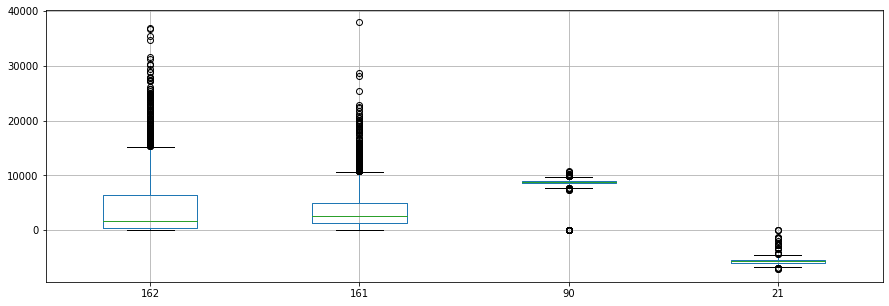

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
Data1_Clean_Corr.boxplot(['162', '161', '90','21'],ax=ax)

Observing few features with Very low or very high SD and can be observed with long outliers.

In [23]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

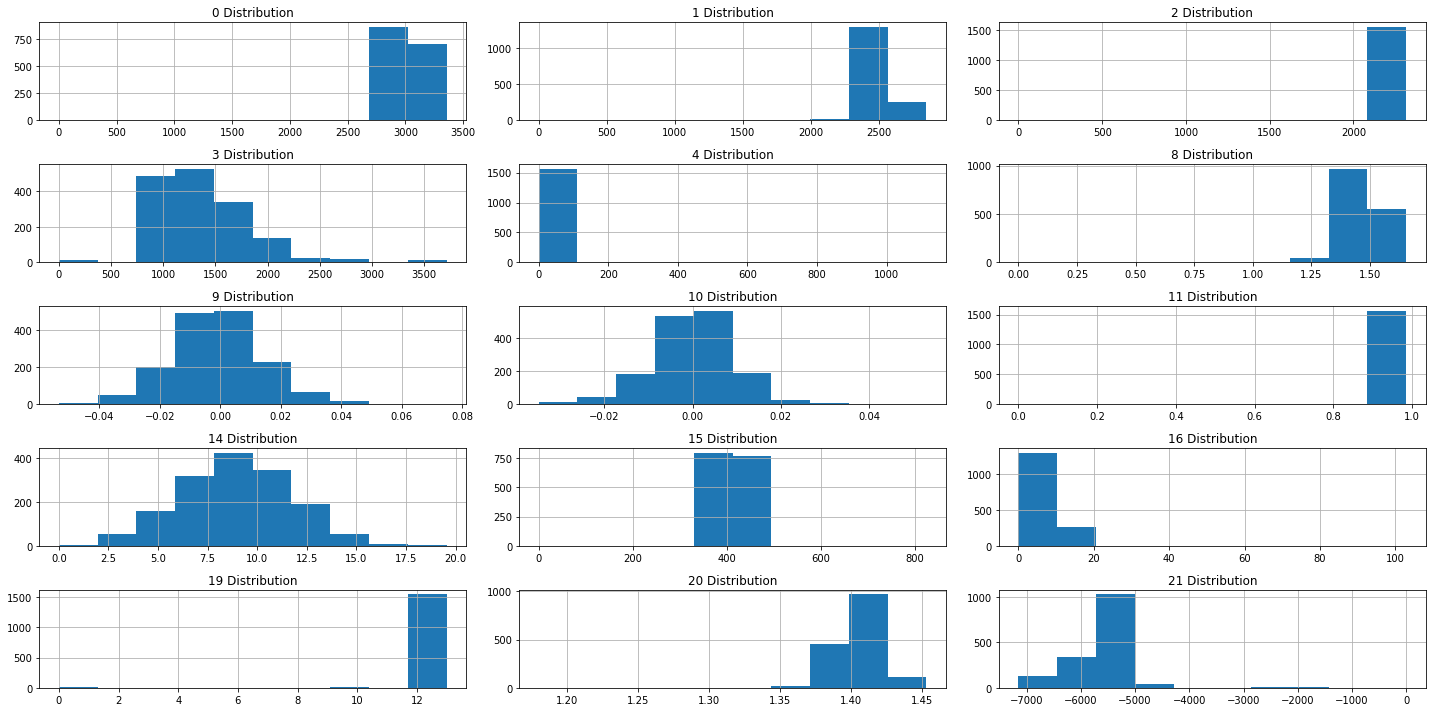

In [24]:
draw_histograms(Data1_Clean_Corr, Data1_Clean_Corr.iloc[:,0:15], 5, 3)

From Above Column 2, 4,11,19 has very low variation, There might be more column with same behaviour 


Get the target column distribution

Text(0.5, 1.0, 'Correlation heatmap for the Data')

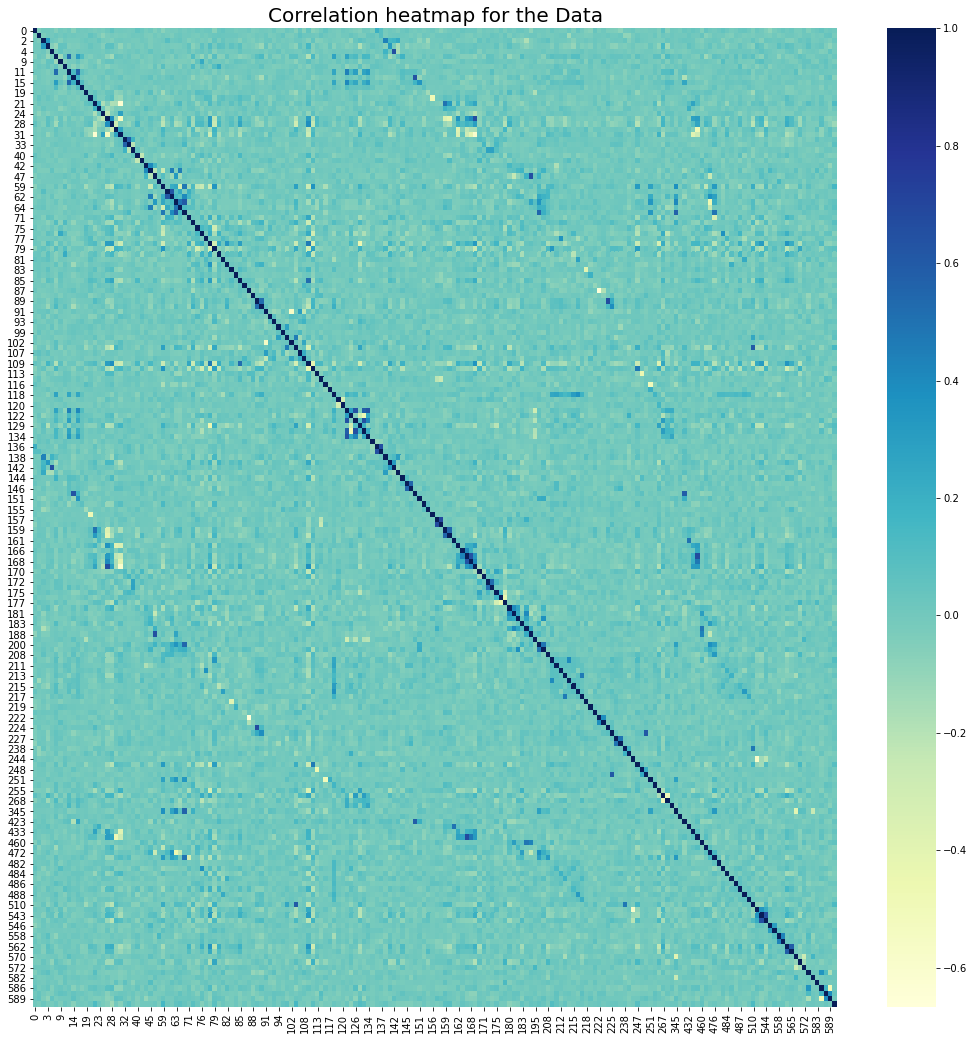

In [25]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(Data1_Clean_Corr.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

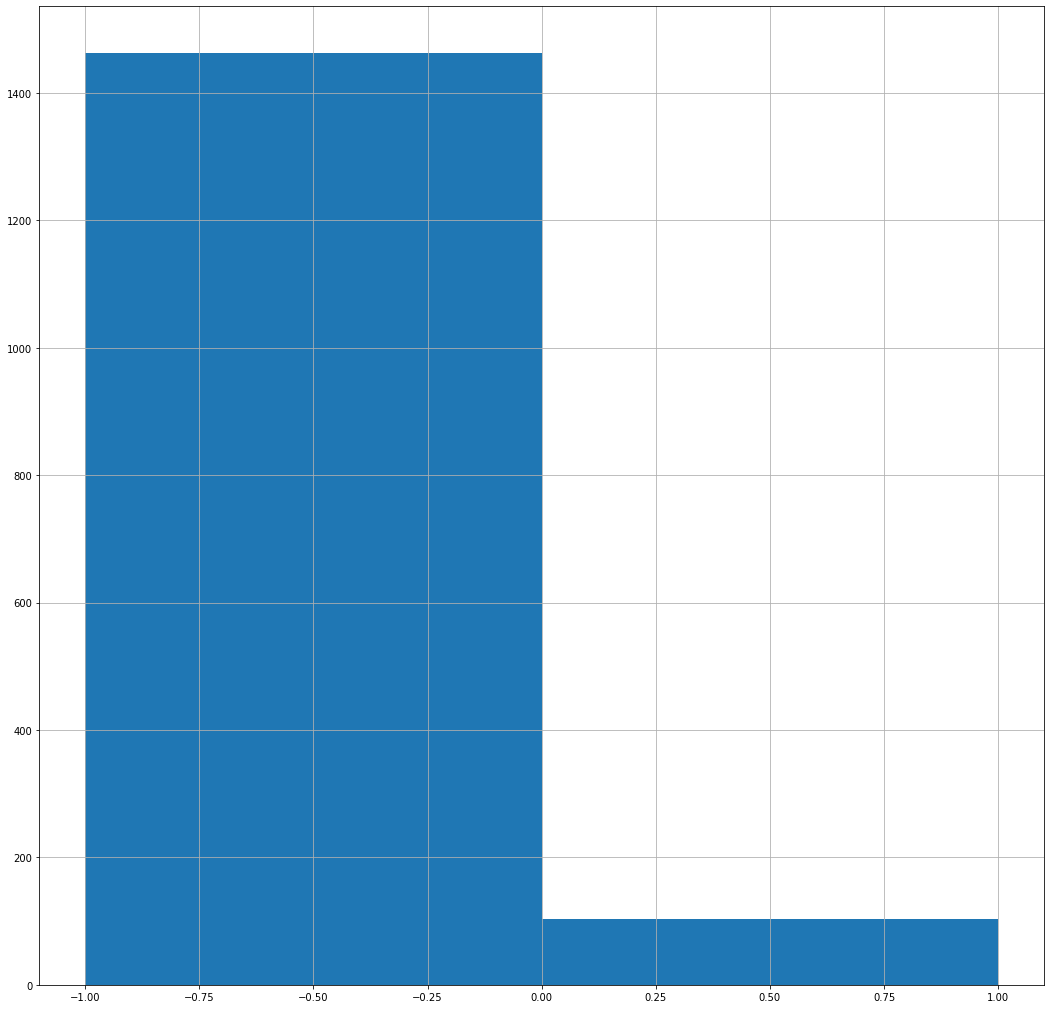

In [26]:
Data1_Clean_Corr['Pass/Fail'].hist(bins=2)

**The target column highly imbalanced which need to be treated** 

In [27]:
Data1_Clean_Corr["Pass/Fail"].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

**The target column contains 104 Pass and 1463 fail cases** 

# Creating Independent and Dependent Variables
X will hold all predictors and Y will have the taret which is Pass/Fail column

In [28]:
X = Data1_Clean_Corr.drop('Pass/Fail', axis=1)
y = Data1_Clean_Corr[['Pass/Fail']]

**AS the target column is very unbalanced we are going to use upsample and down sample technique to train Logistic Regression Model**

In [29]:
!pip install imblearn

In [30]:
from sklearn.linear_model import LogisticRegression
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics


from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

In [31]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
type(X_train)
# gettiing the shapes
print("shape of x_train: ", X_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 187)
shape of x_test:  (471, 187)
shape of y_train:  (1096, 1)
shape of y_test:  (471, 1)


In [32]:
# checking split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Data1_Clean_Corr.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Data1_Clean_Corr.index)) * 100))

69.94% data is in training set
30.06% data is in test set


#### Scaling of the Data

- From the dataset it is quite evident that different independent variables have different scales e.g: DB, %age, Hz etc. Now, Machine learning algorithms dont recognize the unit of data; Hence, it won't be prudent to compare DB with a %age or %age with Hz. Higher ranging numbers in one of the attributes will have superiority. 10 DB and 10% means different but machine learning algorithm understand both to be the same.

##### Scales impacts

- gradient descent based algorithms like Linear Regression, Logistics Regression
- Distance based algorithms like KNN, K-means and SVM

##### Scales dont impact:

- Tree based algorithms like Decision trees

In [33]:
# fitting a scaler function to scale test and train to avoid data leakage aka to keep the sanctity of the test data

scaler = StandardScaler()  # A scaler function (z-score scaler)

#fitting the scaler funstion with train set
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train = X_train_scaled 
X_test = X_test_scaled

In [34]:
# Since we will be using multiple models using the same data, the following is a user defined function for that purpose 

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fir the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score, recall, precision, specificity, f1_score  # return all the metrics

SMOTE to upsample smaller class

In [35]:
print("Before UpSampling, counts of label '-1': {}".format((y_train==-1).sum()))
print("Before UpSampling, counts of label '1': {} \n".format((y_train==1).sum()))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


print("After UpSampling, counts of label '-1': {}".format((y_train_res==-1).sum()))
print("After UpSampling, counts of label '1': {} \n".format((y_train_res==1).sum()))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



Before UpSampling, counts of label '-1': Pass/Fail    1015
dtype: int64
Before UpSampling, counts of label '1': Pass/Fail    81
dtype: int64 

After UpSampling, counts of label '-1': 1015
After UpSampling, counts of label '1': 1015 

After UpSampling, the shape of train_X: (2030, 187)
After UpSampling, the shape of train_y: (2030,) 



In [36]:
# Fit the model on original data i.e. before upsampling
lr = LogisticRegression() 
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test) 
from sklearn import metrics

Confusion Matrix - Logistic Regression


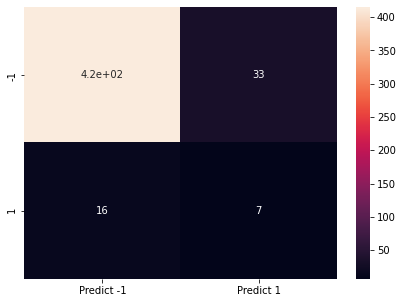

In [37]:
print("Confusion Matrix - Logistic Regression")
cm=metrics.confusion_matrix(y_test, lr.predict(X_test), labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["-1","1"]],
                  columns = [i for i in ["Predict -1","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

* Definately this prediction not able to identify all Dail cases effieciently.

In [38]:
# fit model on upsampled data 

lu = LogisticRegression() 
lu_accuracy, lu_recall, lu_precision, lu_specificity, lu_f1_score = fit_n_print(lu, X_train_res, X_test, y_train_res, y_test) 


Confusion Matrix - Logistic Regression


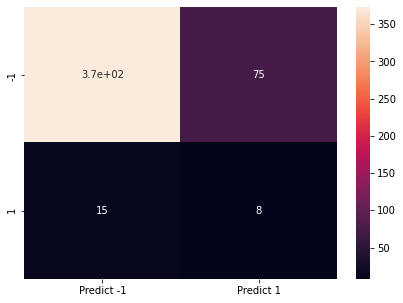

In [39]:
print("Confusion Matrix - Logistic Regression")
cm=metrics.confusion_matrix(y_test, lu.predict(X_test), labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["-1","1"]],
                  columns = [i for i in ["Predict -1","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

* Using Upsampling the Type 2 error is reduced little while Type 1 error significantly increased.
* Upsampling is not boosting the predictions in the Minority Class.So we try Undersampling to boost the prediction of the prediction class


## IMBLearn Random Under Sampling

In [40]:
from imblearn.under_sampling import RandomUnderSampler

In [41]:
print("Before UpSampling, counts of label '-1': {}".format((y_train==-1).sum()))
print("Before UpSampling, counts of label '1': {} \n".format((y_train==1).sum()))
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)
print("After UpSampling, counts of label '-1': {}".format((y_rus==-1).sum()))
print("After UpSampling, counts of label '1': {} \n".format((y_rus==1).sum()))



print('After UpSampling, the shape of train_X: {}'.format(X_rus.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_rus.shape))

Before UpSampling, counts of label '-1': Pass/Fail    1015
dtype: int64
Before UpSampling, counts of label '1': Pass/Fail    81
dtype: int64 

After UpSampling, counts of label '-1': 81
After UpSampling, counts of label '1': 81 

After UpSampling, the shape of train_X: (162, 187)
After UpSampling, the shape of train_y: (162, 1) 



In [42]:
ld = LogisticRegression() 
ld_accuracy, ld_recall, ld_precision, ld_specificity, ld_f1_score = fit_n_print(ld, X_rus, X_test, y_rus, y_test) 

Confusion Matrix - Logistic Regression


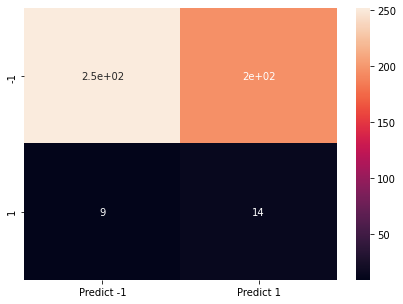

In [43]:
print("Confusion Matrix - Logistic Regression")
cm=metrics.confusion_matrix(y_test, ld.predict(X_test), labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["-1","1"]],
                  columns = [i for i in ["Predict -1","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

We are now able to predict minority class i.e. Fail prediction with very High Accuracy.

In [44]:
  result1 = pd.DataFrame({'Model' : ['LR - Original','LR - Upsampled Data','LD - Under Sample '],
                          'Accuracy': [ lr_accuracy , lu_accuracy, ld_accuracy ],
                          'Recall' : [lr_recall, lu_recall, ld_recall],
                          'Precision': [lr_precision, lu_precision, ld_precision  ],
                          'Specificity': [lr_specificity, lu_specificity, ld_specificity ],
                          'F1 Score' : [lr_f1_score,lu_f1_score, ld_f1_score]})
  result1

Model  Accuracy    Recall  Precision  Specificity  F1 Score
0        LR - Original 0.8960000 0.3040000  0.1750000    0.9260000 0.2220000
1  LR - Upsampled Data 0.8090000 0.3480000  0.0960000    0.8330000 0.1500000
2   LD - Under Sample  0.5650000 0.6090000  0.0670000    0.5620000 0.1210000

#### Observations : 
* Undersampling improving Recall by almost 100 percent which means we are able to minimize the type one error and able to predict True Failours so Undersampling is a good strategy

Under Sampling is Giving Good Ratio of Type 1 and Type 2 Error





In [45]:
X_rus.mean()


0.007447997853012974

In [46]:
X_test.mean()


0.004111319806086225

# 5. Model Training, Testing, Tuning



Spliting the Data Set into 3 parts

In [47]:
# split the full data 80:20 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=101)

# split training data 87.5:12.5 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=101)

print("len(X): {} len(y): {} \nlen(X_train): {}, len(X_valid): {}, len(X_test): \
{} \nlen(y_train): {}, len(y_valid): {}, len(y_test): {}".format(len(X), len(y),\
len(X_train), len(X_valid), len(X_test), len(y_train), len(y_valid), \
len(y_test))) 

len(X): 1567 len(y): 1567 
len(X_train): 1096, len(X_valid): 314, len(X_test): 157 
len(y_train): 1096, len(y_valid): 314, len(y_test): 157


As we seen in previous steps. Undersampling gives good recall, hence I am going to undersample training fold

In [48]:
print("Before UpSampling, counts of label '-1': {}".format((y_train==-1).sum()))
print("Before UpSampling, counts of label '1': {} \n".format((y_train==1).sum()))
rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)
print("After UpSampling, counts of label '-1': {}".format((y_rus==-1).sum()))
print("After UpSampling, counts of label '1': {} \n".format((y_rus==1).sum()))



print('After UpSampling, the shape of train_X: {}'.format(X_rus.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_rus.shape))

Before UpSampling, counts of label '-1': Pass/Fail    1019
dtype: int64
Before UpSampling, counts of label '1': Pass/Fail    77
dtype: int64 

After UpSampling, counts of label '-1': 77
After UpSampling, counts of label '1': 77 

After UpSampling, the shape of train_X: (154, 187)
After UpSampling, the shape of train_y: (154, 1) 



In [49]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# SVM

In [214]:
svm = SVC(random_state=1, gamma = 'auto')
pipe = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components = 100)), ('model', svm)])
pipe.fit(X_rus, y_rus) #fitting undersample data

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Testing the validation set

In [215]:
svm_score_train = pipe.score(X_valid, y_valid)
svm_score_train

0.6719745222929936

## SVM : KFOLD Validation

In [178]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [213]:
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(svm, X_valid, y_valid, cv=kfold)


In [180]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1.         1.         0.85714286 1.         1.         0.85714286
 0.71428571 1.         1.         0.85714286 0.85714286 0.71428571
 0.85714286 1.         1.         1.         1.         1.
 0.66666667 1.         1.         0.83333333 0.83333333 1.
 0.83333333 1.         1.         0.83333333 1.         1.
 1.         1.         0.83333333 1.         0.83333333 1.
 0.83333333 1.         1.         1.         1.         1.
 1.         0.83333333 0.83333333 1.         1.         1.
 1.         1.        ]
Accuracy: 93.762% (9.294%)


From Above we can say that this algorithm will give 85 to 100% Accuracy in production

## Grid Search CV


In [181]:
# Grid Search for tuning parameters
from sklearn.model_selection import GridSearchCV
# RandomizedSearch for tuning (possibly faster than GridSearch)
from sklearn.model_selection import RandomizedSearchCV

In [182]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'] }

In [183]:

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [184]:
# fitting the model for grid search 
grid.fit(X_rus, y_rus) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.467, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [185]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [186]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [187]:
grid_predictions = grid.predict(X_valid) 
grid_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [188]:
# print classification report 
print(classification_report(y_valid, grid_predictions)) 

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       294
           1       0.06      1.00      0.12        20

    accuracy                           0.06       314
   macro avg       0.03      0.50      0.06       314
weighted avg       0.00      0.06      0.01       314



## as we are concentrating on failures by down sampling. Here we are getting almost 100% accuracy on Recall, that means we are able to predict all the failure in the valid slplit of data.

## SVM : Random Search CV


In [189]:
# run randomized search
samples = 10  # number of random samples 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'] }

In [64]:
randomCV = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=samples) #default cv = 3

In [65]:
randomCV.fit(X_rus, y_rus)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [66]:
# print best parameter after tuning 
print(randomCV.best_params_) 

{'kernel': 'rbf', 'gamma': 1, 'C': 10}


In [67]:
# print how our model looks after hyper-parameter tuning 
print(randomCV.best_estimator_) 

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)


In [68]:
random_predictions = randomCV.predict(X_valid) 

In [69]:
# print classification report 
print(classification_report(y_valid, random_predictions)) 

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       294
           1       0.06      1.00      0.12        20

    accuracy                           0.06       314
   macro avg       0.03      0.50      0.06       314
weighted avg       0.00      0.06      0.01       314



In [190]:
#fitting the Test data into the SVM 
svm_score_test = pipe.score(X_test, y_test)
svm_score_test

0.643312101910828

The score on SVM for the test data is 70%

# Logistic Regression

In [191]:
logisReg = LogisticRegression()
pipe = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components = 100)), ('model', logisReg)])
pipe.fit(X_rus, y_rus) #fitting undersample data

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [192]:
lg_score_train = pipe.score(X_valid, y_valid)
lg_score_train

0.6210191082802548

## LG : KFOLD Validation


In [73]:
results = cross_val_score(logisReg, X_valid, y_valid, cv=kfold)

In [74]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1.         1.         0.85714286 1.         1.         0.85714286
 0.71428571 1.         1.         0.85714286 0.85714286 0.71428571
 0.85714286 1.         1.         0.83333333 1.         1.
 0.66666667 1.         0.66666667 0.83333333 0.83333333 0.83333333
 0.83333333 1.         1.         0.83333333 1.         1.
 1.         1.         0.83333333 1.         0.83333333 1.
 0.66666667 1.         1.         1.         1.         1.
 1.         0.83333333 0.83333333 1.         1.         1.
 1.         1.        ]
Accuracy: 92.095% (10.621%)


# Grid Search CV

In [75]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'fit_intercept': [True, False], 
              'warm_start': [True,False],
              'random_state': [1]}

In [76]:
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3) 

In [77]:
# fitting the model for grid search 
grid.fit(X_rus, y_rus) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=True ......
[CV]  C=0.1, fit_intercept=True, random_state=1, warm_start=True, score=0.613, total=   0.0s
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=True ......
[CV]  C=0.1, fit_intercept=True, random_state=1, warm_start=True, score=0.677, total=   0.1s
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=True ......
[CV]  C=0.1, fit_intercept=True, random_state=1, warm_start=True, score=0.581, total=   0.0s
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=True ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, fit_intercept=True, random_state=1, warm_start=True, score=0.355, total=   0.0s
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=True ......
[CV]  C=0.1, fit_intercept=True, random_state=1, warm_start=True, score=0.367, total=   0.0s
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=False .....
[CV]  C=0.1, fit_intercept=True, random_state=1, warm_start=False, score=0.613, total=   0.0s
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=False .....
[CV]  C=0.1, fit_intercept=True, random_state=1, warm_start=False, score=0.677, total=   0.0s
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=False .....
[CV]  C=0.1, fit_intercept=True, random_state=1, warm_start=False, score=0.581, total=   0.0s
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=False .....
[CV]  C=0.1, fit_intercept=True, random_state=1, warm_start=False, score=0.355, total=   0.0s
[CV] C=0.1, fit_intercept=True, random_state=1, warm_start=False .....
[CV]  C=0.1,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False], 'random_state': [1],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [78]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 100, 'fit_intercept': True, 'random_state': 1, 'warm_start': True}


In [79]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)


In [80]:
grid_predictions = grid.predict(X_valid) 

In [81]:
# print classification report 
print(classification_report(y_valid, grid_predictions)) 

              precision    recall  f1-score   support

          -1       0.94      0.58      0.72       294
           1       0.08      0.50      0.13        20

    accuracy                           0.58       314
   macro avg       0.51      0.54      0.43       314
weighted avg       0.89      0.58      0.68       314



## LG : Random Search CV

In [83]:
# run randomized search
samples = 10  # number of random samples 
# defining parameter range 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'fit_intercept': [True, False], 
              'warm_start': [True,False],
              'random_state': [1]}

In [86]:
randomCV = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, n_iter=samples) #default cv = 3

In [87]:
randomCV.fit(X_rus, y_rus)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'fit_intercept': [True, False],
                                        'random_state': [1],
                                        'warm_start': [True, False]},
     

In [88]:
# print best parameter after tuning 
print(randomCV.best_params_) 

{'warm_start': False, 'random_state': 1, 'fit_intercept': True, 'C': 100}


In [89]:
# print how our model looks after hyper-parameter tuning 
print(randomCV.best_estimator_) 

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [90]:
random_predictions = randomCV.predict(X_valid) 

In [91]:
# print classification report 
print(classification_report(y_valid, random_predictions)) 

              precision    recall  f1-score   support

          -1       0.94      0.58      0.72       294
           1       0.08      0.50      0.13        20

    accuracy                           0.58       314
   macro avg       0.51      0.54      0.43       314
weighted avg       0.89      0.58      0.68       314



In [193]:
#fitting the Test data into the SVM 
lg_score_test = pipe.score(X_test, y_test)
lg_score_test

0.6560509554140127

LogisticRegrassion Score is less than the SVM score.

# KNN Classifier

In [94]:
# Importing various classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [194]:
knn = KNeighborsClassifier()
pipe = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components = 100)), ('model', knn)])
pipe.fit(X_rus, y_rus) #fitting undersample data

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [195]:
knn_score_train = pipe.score(X_valid, y_valid)
knn_score_train

0.5318471337579618

## KNN : KFOLD Validation

In [97]:
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(knn, X_valid, y_valid, cv=kfold)

In [98]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1.         1.         0.85714286 1.         1.         0.85714286
 0.71428571 1.         1.         0.85714286 0.85714286 0.71428571
 0.85714286 1.         1.         1.         1.         1.
 0.66666667 1.         1.         0.83333333 0.83333333 1.
 0.83333333 1.         1.         0.83333333 1.         1.
 1.         1.         0.83333333 1.         0.83333333 1.
 0.83333333 1.         1.         1.         1.         1.
 1.         0.83333333 0.83333333 1.         1.         1.
 1.         1.        ]
Accuracy: 93.762% (9.294%)


## KNN:Grid Search CV

In [99]:
# defining parameter range 
param_grid = {'n_neighbors': [3,5,11,19],  
              'weights': ['uniform','distance'], 
              'metric': ['euclidean','manhattan']
              }

In [100]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3) 

In [101]:
# fitting the model for grid search 
grid.fit(X_rus, y_rus) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.355, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.581, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.387, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.581, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.333, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.355, total=   0.0s
[CV] metric=eu

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=19, weights=distance, score=0.548, total=   0.0s
[CV] metric=euclidean, n_neighbors=19, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=19, weights=distance, score=0.452, total=   0.0s
[CV] metric=euclidean, n_neighbors=19, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=19, weights=distance, score=0.645, total=   0.0s
[CV] metric=euclidean, n_neighbors=19, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=19, weights=distance, score=0.500, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=3, weights=uniform, score=0.419, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=3, weights=uniform, score=0.548, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=3, weights=uniform, score=0.387,

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [102]:
grid_predictions = grid.predict(X_valid) 
grid_predictions

array([-1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
        1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,
        1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1

In [103]:
# print classification report 
print(classification_report(y_valid, grid_predictions)) 

              precision    recall  f1-score   support

          -1       0.95      0.49      0.64       294
           1       0.07      0.60      0.13        20

    accuracy                           0.49       314
   macro avg       0.51      0.54      0.39       314
weighted avg       0.89      0.49      0.61       314



## KNN : Random Search CV

In [104]:
# run randomized search
samples = 10  # number of random samples 

In [105]:
randomCV = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=samples) #default cv = 3

In [106]:
randomCV.fit(X_rus, y_rus)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 11, 19],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [107]:
# print best parameter after tuning 
print(randomCV.best_params_) 

{'weights': 'uniform', 'n_neighbors': 19, 'metric': 'euclidean'}


In [108]:
# print how our model looks after hyper-parameter tuning 
print(randomCV.best_estimator_) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


In [109]:
random_predictions = randomCV.predict(X_valid) 

In [110]:
# print classification report 
print(classification_report(y_valid, random_predictions)) 

              precision    recall  f1-score   support

          -1       0.95      0.49      0.64       294
           1       0.07      0.60      0.13        20

    accuracy                           0.49       314
   macro avg       0.51      0.54      0.39       314
weighted avg       0.89      0.49      0.61       314



In [196]:
#fitting the Test data into the SVM 
knn_score_test = pipe.score(X_test, y_test)
knn_score_test

0.5477707006369427

Till now KNN is the least performed Model

# Random Forest Classifier

In [120]:
rf = RandomForestClassifier()

In [197]:
pipe = Pipeline([('scaler', StandardScaler()),('PCA', PCA(n_components = 100)), ('model', rf)])
pipe.fit(X_rus, y_rus) #fitting undersample data

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_

In [198]:
rf_score_train = pipe.score(X_valid, y_valid)
rf_score_train

0.589171974522293

## Random Forest Classifier : KFOLD Validation

In [125]:
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(RandomForestClassifier(), X_valid, y_valid, cv=kfold)

In [126]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1.         1.         0.85714286 1.         1.         0.85714286
 0.71428571 1.         1.         0.85714286 0.85714286 0.71428571
 0.85714286 1.         1.         0.83333333 1.         1.
 0.66666667 1.         1.         0.83333333 0.83333333 1.
 0.83333333 1.         1.         0.83333333 1.         1.
 1.         1.         0.83333333 1.         0.83333333 1.
 0.83333333 1.         1.         1.         1.         1.
 1.         0.83333333 0.83333333 1.         1.         1.
 1.         1.        ]
Accuracy: 93.429% (9.362%)


## Random Forest Classifier : Grid Search CV

In [153]:
# defining parameter range 
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2],
 'n_estimators': [200, 400] }

In [154]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3) 

In [155]:
# fitting the model for grid search 
grid.fit(X_rus, y_rus) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.710, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.677, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.806, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.581, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.567, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400, score=0.742, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [156]:
# print best parameter after tuning 
print(grid.best_params_) 

{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


In [157]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [158]:
grid_predictions = grid.predict(X_valid) 
grid_predictions

array([ 1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
        1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
        1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
        1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1

In [159]:
# print classification report 
print(classification_report(y_valid, grid_predictions)) 

              precision    recall  f1-score   support

          -1       0.97      0.67      0.79       294
           1       0.13      0.70      0.21        20

    accuracy                           0.67       314
   macro avg       0.55      0.69      0.50       314
weighted avg       0.92      0.67      0.76       314



## Random Forest Classifier : Random Search CV

In [161]:
randomCV = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, n_iter=samples) #default cv = 3

In [162]:
randomCV.fit(X_rus, y_rus)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [163]:
# print best parameter after tuning 
print(randomCV.best_params_) 

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [164]:
# print how our model looks after hyper-parameter tuning 
print(randomCV.best_estimator_) 

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [165]:
# print classification report 
print(classification_report(y_valid, random_predictions)) 

              precision    recall  f1-score   support

          -1       0.95      0.49      0.64       294
           1       0.07      0.60      0.13        20

    accuracy                           0.49       314
   macro avg       0.51      0.54      0.39       314
weighted avg       0.89      0.49      0.61       314



In [199]:
#fitting the Test data into the SVM 
rf_score_test = pipe.score(X_test, y_test)
rf_score_test

0.6305732484076433

In [205]:
# Test Scores
pd.DataFrame([rf_score_test, knn_score_test, lg_score_test, svm_score_train],
             index = ['Random Forest Test', 'KNN Test', 'Logistic Regression','SVM'],columns = ['Accuracy'])
					  


Accuracy
Random Forest Test  0.6305732
KNN Test            0.5477707
Logistic Regression 0.6560510
SVM                 0.6719745

In [204]:
#Train Scores
pd.DataFrame([rf_score_train, knn_score_train, lg_score_train, svm_score_train],
             index = ['Random Forest Train', 'KNN Train', 'Logistic Regression','SVM'], columns = ['Accuracy'])

Accuracy
Random Forest Train 0.5891720
KNN Train           0.5318471
Logistic Regression 0.6210191
SVM                 0.6719745

## For all the above evaluation, PCA is 100 and Data is DownSampled to the Failure condition, My Aim is to Predit all Failure Correctly, 

### **SVM** is the best fit Model and able to spot the failure with 100% Recall also among all models SVM has the highest Accuracy among all four

# Project Step
Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.

In [207]:
Data2.head()

Time            0            1            2            3  \
0 2008-07-19 11:55:00 3030.9300000 2564.0000000 2187.7333000 1411.1265000   
1 2008-07-19 12:32:00 3095.7800000 2465.1400000 2230.4222000 1463.6606000   
2 2008-07-19 13:17:00 2932.6100000 2559.9400000 2186.4111000 1698.0172000   
3 2008-07-19 14:43:00 2988.7200000 2479.9000000 2199.0333000  909.7926000   
4 2008-07-19 15:22:00 3032.2400000 2502.8700000 2233.3667000 1326.5200000   

          4    5           6         7         8          9         10  \
0 1.3602000  100  97.6133000 0.1242000 1.5005000  0.0162000 -0.0034000   
1 0.8294000  100 102.3433000 0.1247000 1.4966000 -0.0005000 -0.0148000   
2 1.5102000  100  95.4878000 0.1241000 1.4436000  0.0041000  0.0013000   
3 1.3204000  100 104.2367000 0.1217000 1.4882000 -0.0124000 -0.0033000   
4 1.5334000  100 100.3967000 0.1235000 1.5031000 -0.0031000 -0.0072000   

         11          12  13         14          15         16        17  \
0 0.9455000 202.4396000   0  7.9558000 414.8710000 10.0433000 0.9680000   
1 0.9627000 200.5470000   0 10.1548000 414.7347000  9.2599000 0.9701000   
2 0.9615000 202.0179000   0  9.5157000 416.7075000  9.3144000 0.9674000   
3 0.9629000 201.8482000   0  9.6052000 422.2894000  9.6924000 0.9687000   
4 0.9569000 201.9424000   0 10.5661000 420.5925000 10.3387000 0.9735000   

           18         19        20            21           22            23  \
0 192.3963000 12.5190000 1.4026000 -5419.0000000 2916.5000000 -4043.7500000   
1 191.2872000 12.4608000 1.3825000 -5441.5000000 2604.2500000 -3498.7500000   
2 192.7035000 12.5404000 1.4123000 -5447.7500000 2701.7500000 -4047.0000000   
3 192.1557000 12.4782000 1.4011000 -5468.2500000 2648.2500000 -4515.0000000   
4 191.6037000 12.4735000 1.3888000 -5476.2500000 2635.2500000 -3987.5000000   

             24        25        26        27         28        29        30  \
0   751.0000000 0.8955000 1.7730000 3.0490000 64.2333000 2.0222000 0.1632000   
1 -1640.2500000 1.2973000 2.0143000 7.3900000 68.4222000 2.2667000 0.2102000   
2 -1916.5000000 1.3122000 2.0295000 7.5788000 67.1333000 2.3333000 0.1734000   
3 -1657.2500000 1.3137000 2.0038000 7.3145000 62.9333000 2.6444000 0.2071000   
4   117.0000000 1.2887000 1.9912000 7.2748000 62.8333000 3.1556000 0.2696000   

         31         32        33         34         35         36         37  \
0 3.5191000 83.3971000 9.5126000 50.6170000 64.2588000 49.3830000 66.3141000   
1 3.4171000 84.9052000 9.7997000 50.6596000 64.2828000 49.3404000 64.9193000   
2 3.5986000 84.7569000 8.6590000 50.1530000 64.1114000 49.8470000 65.8389000   
3 3.3813000 84.9105000 8.6789000 50.5100000 64.1125000 49.4900000 65.1951000   
4 3.2728000 86.3269000 8.7677000 50.2480000 64.1511000 49.7520000 66.1542000   

          38          39         40        41  42          43         44  \
0 86.9555000 117.5132000 61.2900000 4.5150000  70 352.7173000 10.1841000   
1 87.5241000 118.1188000 78.2500000 2.7730000  70 352.2445000 10.0373000   
2 84.7327000 118.6128000 14.3700000 5.4340000  70 364.3782000  9.8783000   
3 86.6867000 117.0442000 76.9000000 1.2790000  70 363.0273000  9.9305000   
4 86.1468000 121.4364000 76.3900000 2.2090000  70 353.3400000 10.4091000   

           45          46        47          48  49          50          51  \
0 130.3691000 723.3092000 1.3072000 141.2282000   1 624.3145000 218.3174000   
1 133.1727000 724.8264000 1.2887000 145.8445000   1 631.2618000 205.1695000   
2 131.8027000 734.7924000 1.2992000 141.0845000   1 637.2655000 185.7574000   
3 131.8027000 733.8778000 1.3027000 142.5427000   1 637.3727000 189.9079000   
4 176.3136000 789.7523000 1.0341000 138.0882000   1 667.7418000 233.5491000   

   52        53        54    55        56        57        58          59  \
0   0 4.5920000 4.8410000  2834 0.9317000 0.9484000 4.7057000  -1.7264000   
1   0 4.5900000 4.8420000  2853 0.9324000 0.9479000 4.6820000   0.8073000   
2   0 4.4860000 4.7480000  2936 0.9139000 0.9447000 4.5873

Drop the Time Column

In [210]:
Data2.drop(Data2.columns[[0]],axis =1, inplace =True)

In [211]:
Data2.shape

(18, 590)

In [217]:
# Droping columns which has more than 40% missing values
Data2_Clean = Data2.loc[:, Data2.isin([' ','NULL',0]).mean() < .4]
Data2_Clean.shape

(18, 464)

In [274]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# so better we not take median or mean and replace them with zeros
Data2_Clean = Data2_Clean.replace(np.NaN, 0)
Data2_Clean.isnull().any().any()

False

In [275]:
#replacing the missing values with median values
for cols in Data2_Clean.columns:
  if(cols != 'Pass/Fail'):
    Data2_Clean[cols] = Data2_Clean[cols].fillna(Data2_Clean[cols].median())

In [276]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
Data2_Clean_Corr = remove_collinear_features(Data2_Clean,0.70)

6 | 3 | 0.85
14 | 7 | 0.75
16 | 11 | 0.71
17 | 12 | 0.82
18 | 12 | 1.0
18 | 17 | 0.82
19 | 12 | 0.87
19 | 17 | 0.87
19 | 18 | 0.87
20 | 11 | 0.72
22 | 21 | 0.95
23 | 21 | 0.95
23 | 22 | 0.91
25 | 21 | 0.77
25 | 23 | 0.83
26 | 21 | 0.93
26 | 22 | 0.89
26 | 23 | 0.95
26 | 25 | 0.94
27 | 24 | 0.81
27 | 25 | 0.95
27 | 26 | 0.79
30 | 29 | 0.91
36 | 34 | 1.0
39 | 32 | 0.82
40 | 38 | 0.72
46 | 45 | 0.94
50 | 45 | 0.89
50 | 46 | 0.96
51 | 47 | 0.74
54 | 53 | 0.96
55 | 53 | 0.79
56 | 53 | 0.7
56 | 55 | 0.77
58 | 43 | 0.71
60 | 43 | 0.97
60 | 58 | 0.7
62 | 45 | 0.85
62 | 46 | 0.86
62 | 50 | 0.79
62 | 61 | 0.87
63 | 59 | 0.75
64 | 59 | 0.89
64 | 63 | 0.77
65 | 59 | 0.87
65 | 63 | 0.83
65 | 64 | 0.97
66 | 45 | 0.79
66 | 46 | 0.9
66 | 50 | 0.83
66 | 61 | 0.86
66 | 62 | 0.94
70 | 45 | 0.76
70 | 46 | 0.88
70 | 50 | 0.88
70 | 61 | 0.88
70 | 62 | 0.88
70 | 66 | 0.94
72 | 58 | 0.75
73 | 58 | 0.75
73 | 72 | 1.0
76 | 59 | 0.8
76 | 65 | 0.71
80 | 43 | 0.74
80 | 57 | 0.73
82 | 78 | 0.86
88 | 20 | 0.71
89 | 

In [259]:
Data2_Clean_Corr.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
5      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
15     float64
21     float64
24     float64
28     float64
29     float64
31     float64
32     float64
33     float64
34     float64
35     float64
37     float64
38     float64
41     float64
42     float64
43     float64
44     float64
45     float64
47     float64
48     float64
49     float64
53     float64
57     float64
59     float64
61     float64
67     float64
68     float64
69     float64
71     float64
75     float64
77     float64
78     float64
79     float64
81     float64
83     float64
84     float64
85     float64
86     float64
87     float64
90     float64
91     float64
92     float64
93     float64
94     float64
95     float64
99     float64
100    float64
102    float64
107    float64
108    float64
109    float64
110    float64
111    float64
113    float64
115    float64
118    flo

In [277]:
Data2_Clean_Corr = Data2_Clean_Corr.astype(float)

In [278]:
from scipy.stats import zscore
Data2_Clean_CorrScaled=Data2_Clean_Corr.apply(zscore)


In [287]:
Data2_Clean_CorrScaled.replace(0,np.nan).dropna(axis=1, how='all')

0          1          2          3          4          7    \
0   0.6336036  0.5517116 -1.2653655  0.8490348  0.5474516  0.9240375   
1   1.9787322 -0.8930727  0.2806773  1.0603449 -1.3729404  1.1394866   
2  -1.4057648  0.4923770 -1.3132509  2.0030074  1.0901396  0.8809477   
3  -0.2419226 -0.6773634 -0.8561190 -1.1675018  0.4034584 -0.1532083   
4   0.6607758 -0.3416696  0.3873168  0.5087185  1.1740754  0.6224087   
5  -1.1228418 -1.3651193  0.3873168  0.5087185  1.1740754  0.6224087   
6   0.6199138 -1.4048706  0.2806773  1.0603449 -1.3729404  1.1394866   
7   1.2133468  2.3953242  0.9498787 -0.7866801 -1.5212751 -1.5320829   
8  -0.6783375  1.0847006  0.9498787 -0.7866801 -1.5212751 -1.5320829   
9   0.3262049 -1.4304459  0.9498787 -0.7866801 -1.5212751 -1.5320829   
10 -0.1313670  0.3209495 -0.9977653 -0.6190385  0.4034584  0.1053307   
11 -1.4839627 -0.6846706 -0.9583292  1.6319085 -0.7705567  1.5703849   
12 -1.6658714 -0.2754661 -0.9977653 -0.6190385  0.4034584  0.1053307   
13  1.0590252  0.0441519 -1.3848799 -1.2968845  0.9331219  0.8378578   
14 -0.7552909  1.5086657  0.0706216 -1.0147280  0.3021566 -1.0150049   
15 -0.2504269  0.2924513  0.0706216 -1.0147280  0.3021566 -1.0150049   
16  0.5732439  0.5059684  1.7233039  0.2349410  0.6733552 -0.5841066   
17  0.6709395 -0.1236220  1.7233039  0.2349410  0.6733552 -0.5841066   

          8          9          10         11         12         15   \
0  -0.2079710  0.7470913 -0.2091713 -1.1823074  0.1189398 -0.4847250   
1  -0.3087271 -0.2409230 -1.5298465  0.8998448 -0.1656876 -0.5112361   
2  -1.6779770  0.0312247  0.3353176  0.7545784  0.0555205 -0.1275148   
3  -0.5257403 -0.9449571 -0.1975864  0.9240559  0.0299994  0.9581978   
4  -0.1408002 -0.3947455 -0.6493964  0.1977238  0.0441661  0.6281407   
5   0.5205733  0.7766725  0.8218822  1.7714434 -0.1769668 -0.6069525   
6   1.8872397 -1.8087300  1.4011257  0.4640455  0.0663786 -0.2874571   
7   0.1743856  0.7175100  0.2658084 -0.8675634  0.1155410 -1.7430422   
8   0.7040011  0.4453624 -0.5798871 -0.7101915  0.1211656  0.0462568   
9   0.7634214  0.7293425  0.7523730 -1.3638904  0.1430473 -0.7771257   
10  0.1511342 -1.3354298  0.3353176 -1.4486292  0.0095915 -1.0514763   
11 -1.0217704  0.7944213 -1.5993558 -1.3033627  0.0718378  0.4937954   
12  0.5799936 -1.7436512  2.6870464  0.5124677  0.0719130 -0.3587824   
13  0.3888153 -1.4478386 -0.1744167 -1.3517849  3.6634730 -1.4538507   
14 -1.5798044  0.6405987 -1.1938853  0.3550957 -0.9429463  0.9733887   
15  0.9804346  1.2677215 -0.0933226  0.7666840 -1.3038814  1.4374993   
16 -1.8536544  0.6760962 -0.2439259  0.8514227 -0.9737010  2.2600648   
17  1.1664459  1.0902339 -0.1280772  0.7303673 -0.9483904  0.6048194   

          21         24         28         29         31         32   \
0  -0.3046010  0.9058674 -0.0384648 -0.9725076  0.3666728 -1.7668552   
1  -0.3216980 -1.2561741  1.5335716 -0.3129493 -0.8823277 -0.1356873   
2  -0.3264472 -1.5059448  1.0498652 -0.1332904  1.3401585 -0.2960893   
3  -0.3420245 -1.2715446 -0.5263368  0.7059268 -1.3207024 -0.1299548   
4  -0.3481034  0.3326382 -0.5638654  2.0849297 -2.6492960  1.4020299   
5  -0.7901559  0.4020315 -0.7348083 -2.0215965  0.3776934  0.4246920   
6  -0.8631031  0.7514843 -1.3269348  0.2864530  0.0434021  2.2969496   
7  -0.2867442 -0.4395034  1.1124254  1.0957271 -0.3717069 -1.2351383   
8   0.6243361  0.7899105 -0.5763625 -0.6428633  0.2148335  0.4291266   
9  -0.2578692  1.0168514  1.0123366 -0.0132481  0.3862650 -1.2351383   
10  1.7405804  0.5527980  1.6419918 -1.1823794  0.1683021 -0.2960893   
11 -0.8203606  0.9072236  0.1617129 -0.8524653  0.3985101  0.4291266   
12 -0.3822974 -1.5210892 -0.3595221  1.1855565  0.4976954 -0.1299548   
13 -0.7990843  0.9806856  1.3709601 -0.2231199  0.4952464 -1.3312930   
14  2.7253677  0.3459744 -0.6889483  0.1065244 -0.3533392  0.0665728   
15  1.7654660  0.3003149 -1.1643233 -0.3731053 -0.0949676  0.0665728   
16 -0.5616260 -1.9837864 -0.3678534  1.5753568 -

In [297]:
np.any(np.isnan(Data2_Clean_CorrScaled))


False

In [296]:
for col in Data2_Clean_CorrScaled:
    if np.isnan(Data2_Clean_CorrScaled[col].iloc[0]) == True:
        del Data2_Clean_CorrScaled[col]

In [299]:
y_data2_pred = svm.predict(Data2_Clean_Corr.iloc[:,:100])

In [300]:
y_data2_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Conclusion

* Here we seen that 188 features are important for the model before applying Algorithm to reduce Dimention.
* Outliers are not treated as I felt those are Natural.
* I concentrated on how to detect Fault in the Production rather than over all accuracy.
* Assumtion is if a model predict all the fault or failure perfectly rest can be treated as pass or ok.
* SVM with PCA, Downsampling giving me the best result (100%), So I have not applied all the models